#NAME : BHUVANESH S
#REG  : 3122235001034
#SEC  : CSE-A

#EX 1 Data Preprocessing

##IRIS DataSet


# 1.Loading  IRIS Dataset using UCI ML Library

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

columns = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "species"
]

df = pd.read_csv(url, header=None, names=columns)

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


# IRIS Dataset Loading using SkLearn

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
iris =load_iris()

X=iris.data
y=iris.target

df=pd.DataFrame(X,columns=iris.feature_names)
df['target']=y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#2.Exploratory Data Analysis

#Scratch Code for Mean, Standard Deviation, Correlation ,Standarization, Normalization Outlier Detection

In [ ]:

sepal_length = [row[0] for row in iris if isinstance(row[0], (int, float))]
sepal_width = [row[1] for row in iris if isinstance(row[1], (int, float))]
petal_length = [row[2] for row in iris if isinstance(row[2], (int, float))]
petal_width = [row[3] for row in iris if isinstance(row[3], (int, float))]



In [ ]:
import math

def mean(values):
    return sum(values) / len(values)

def std(values):
    m = mean(values)
    variance = sum((x - m) ** 2 for x in values) / len(values)
    return math.sqrt(variance)

def covariance(x, y):
    mx = mean(x)
    my = mean(y)
    return sum((xi - mx)*(yi - my) for xi, yi in zip(x, y)) / len(x)

def correlation(x, y):
    return covariance(x, y) / (std(x) * std(y))

def standardize(values):
    m = mean(values)
    s = std(values)
    return [(x - m) / s for x in values]

def normalize(values):
    min_val = min(values)
    max_val = max(values)
    return [(x - min_val) / (max_val - min_val) for x in values]




In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


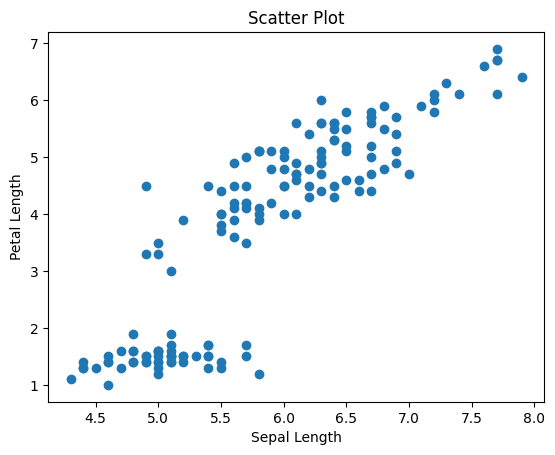

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Scatter Plot")
plt.show()


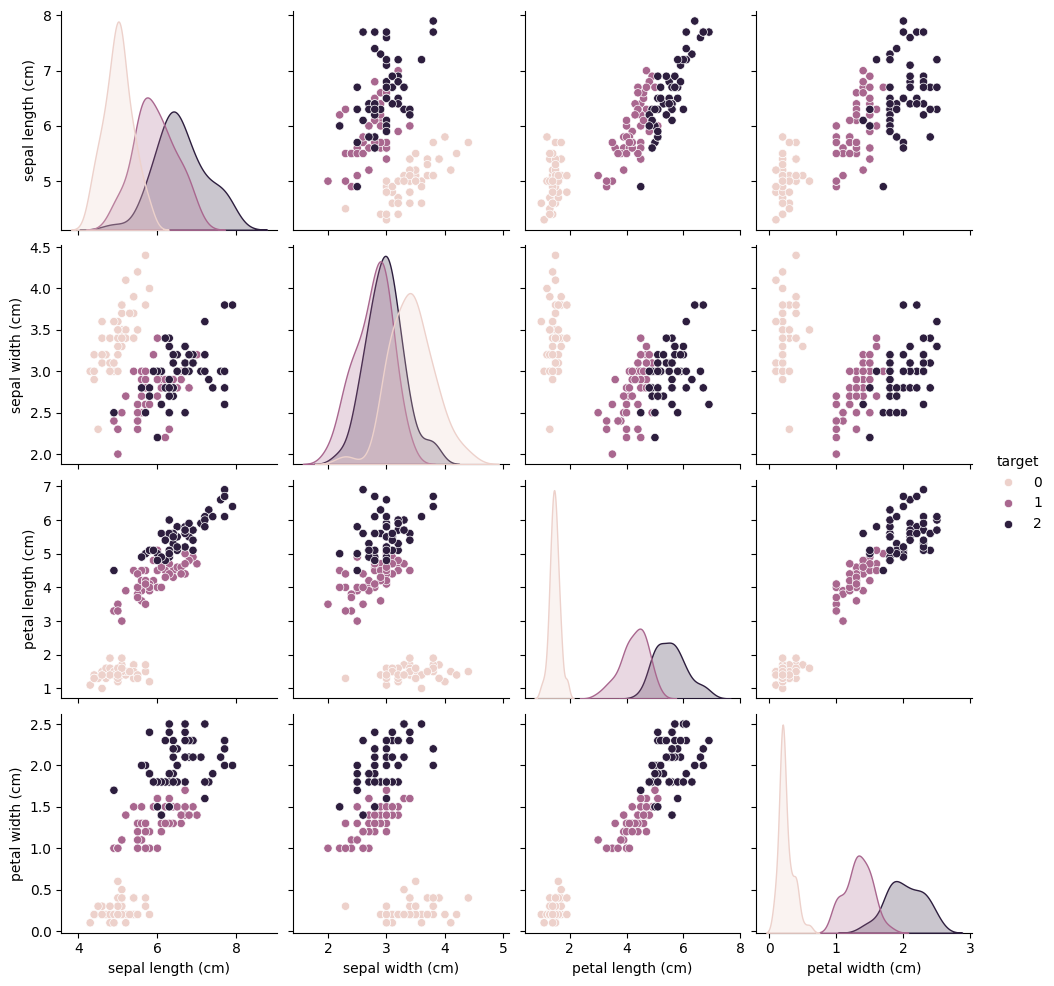

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='target')
plt.show()

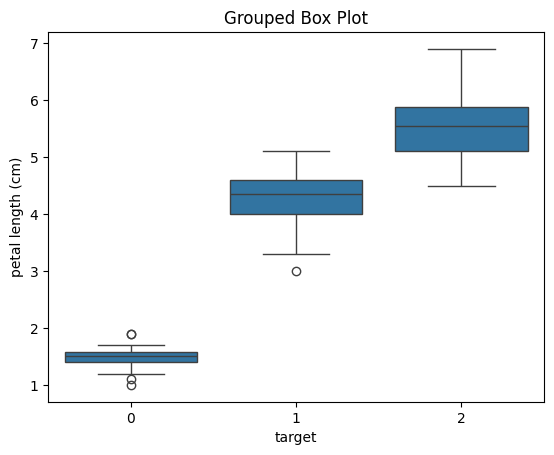

In [ ]:
import seaborn as sns
sns.boxplot(x='target', y='petal length (cm)', data=df)
plt.title("Grouped Box Plot")
plt.show()


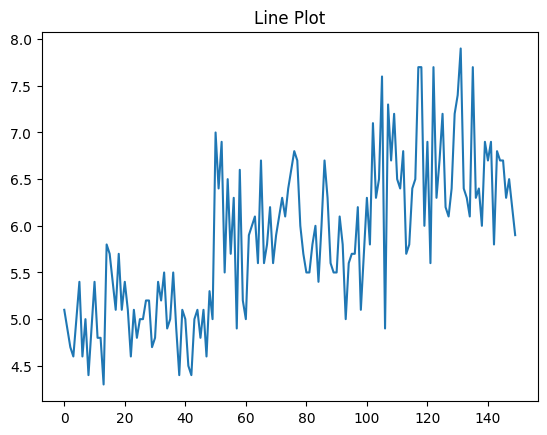

In [ ]:
plt.plot(df['sepal length (cm)'])
plt.title("Line Plot")
plt.show()


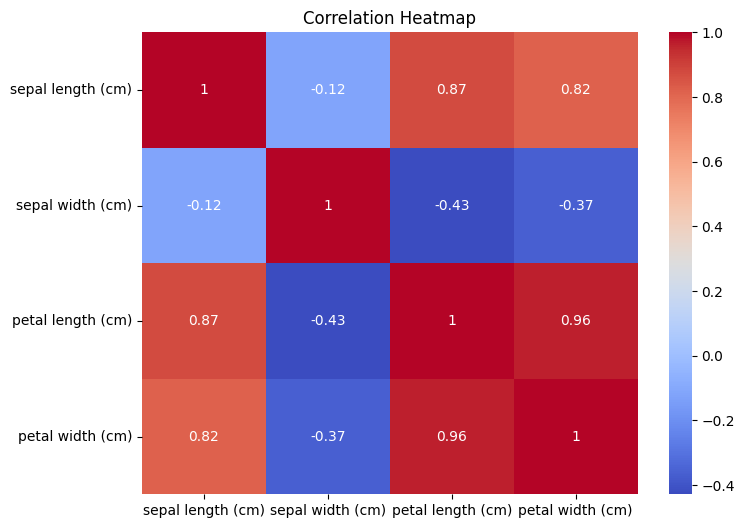

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


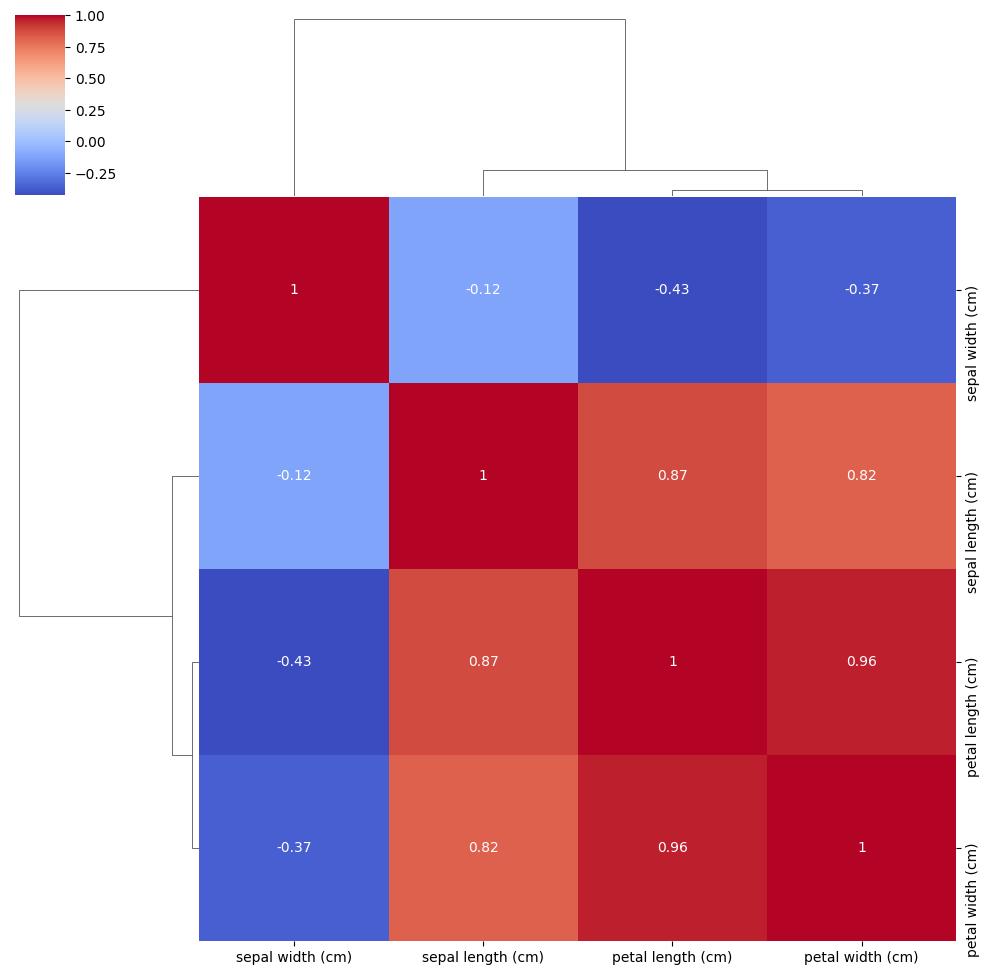

In [ ]:
sns.clustermap(df.iloc[:, :-1].corr(), cmap='coolwarm', annot=True)
plt.show()


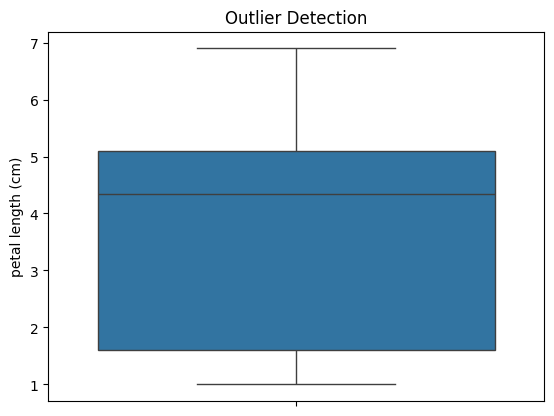

In [ ]:
sns.boxplot(y=df['petal length (cm)'])
plt.title("Outlier Detection")
plt.show()


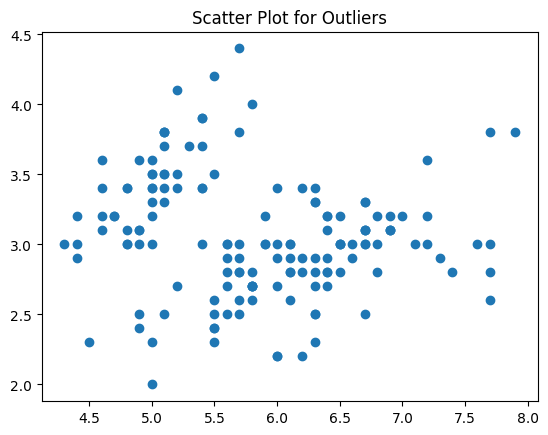

In [ ]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.title("Scatter Plot for Outliers")
plt.show()


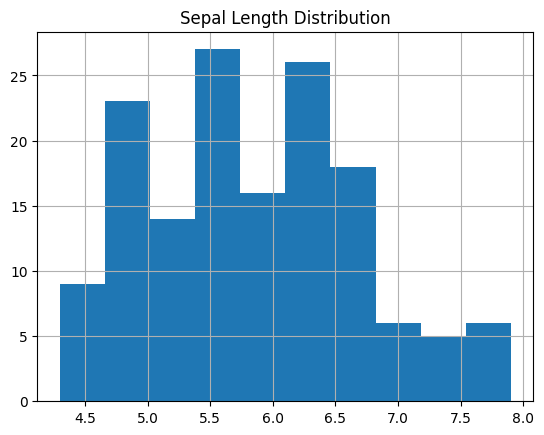

In [ ]:
df['sepal length (cm)'].hist(bins=10)
plt.title("Sepal Length Distribution")
plt.show()


#3. Preprocessing Data
##Handling null values
## Label Encoding

## Standarize the data mean=0, std=1
##Normalize the values 0<x<1

In [ ]:
print(df.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [ ]:
df.fillna(df.mean(), inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_norm=scaler.fit_transform(X)

In [ ]:
print(X_norm)


NameError: name 'X_norm' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

In [ ]:
import numpy as np
print(np.mean(X_std,axis=0))
np.std(X_std, axis=0)

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


array([1., 1., 1., 1.])

# 4.Feature Selection using Corr and ANOVA Test

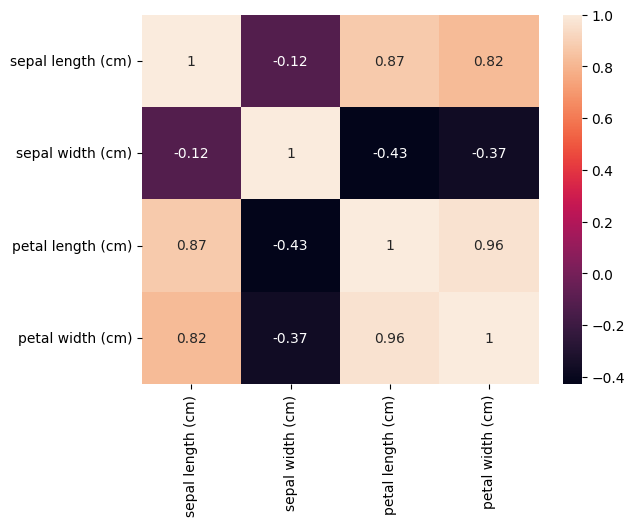

In [ ]:
import seaborn as sns

sns.heatmap(df.iloc[:, :-1].corr(), annot=True)
plt.show()


In [ ]:
df.iloc[:, :-1].corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


#ANOVA F Test

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

func = SelectKBest(score_func=f_classif, k=2)
X_selected = func.fit_transform(X, y)

print("Selected features :",X.columns[func.get_support()])


Selected features : Index(['petal_length', 'petal_width'], dtype='object')


# Chi Square Test

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# chi square need non neg val
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


func = SelectKBest(score_func=chi2, k=2)
X_selected = func.fit_transform(X_scaled, y)


mask = func.get_support()
feature_names = iris.feature_names

print("Selected Features:")
for feature, selected in zip(feature_names, mask):
    if selected:
        print(feature)

# Conclusion

Petal length and petal width are the most important features.

#5.Split the data into training, testing, and validation sets

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Validation + Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (105, 4) (105,)
Testing set shape: (23, 4) (23,)
Validation set shape: (22, 4) (22,)


#Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


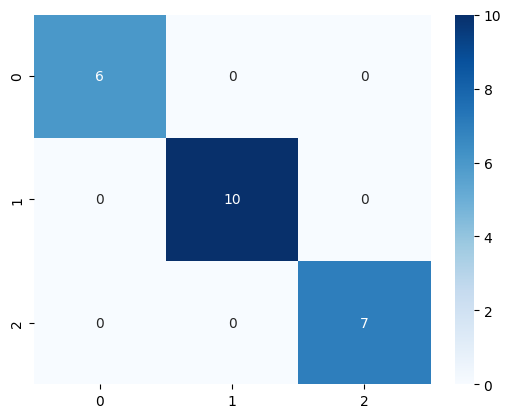

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()


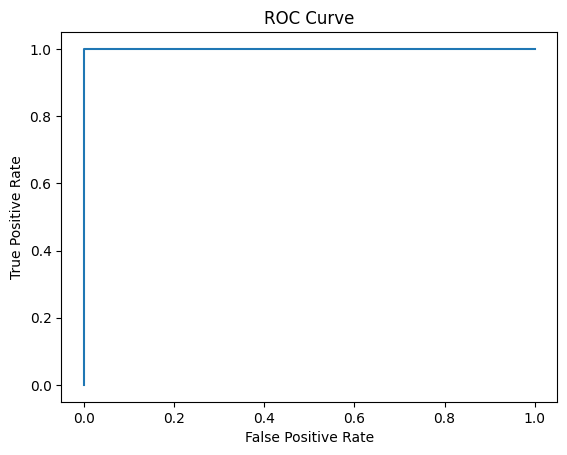

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Score: 1.0


#Without Inbuilt Libraries



In [ ]:
def mean(values):
    return sum(values) / len(values)

data = [1, 2, 3, 4, 5]
print(mean(data))


3.0


In [ ]:
import math

def std(values):
    mu = mean(values)
    variance = sum((x - mu) ** 2 for x in values) / len(values)
    return math.sqrt(variance)

print(std(data))


1.4142135623730951


In [ ]:
def standardize(values):
    mu = mean(values)
    sigma = std(values)
    return [(x - mu) / sigma for x in values]

standardized = standardize(data)
print(standardized)


[-1.414213562373095, -0.7071067811865475, 0.0, 0.7071067811865475, 1.414213562373095]


In [ ]:
print(mean(standardized))
print(std(standardized))


0.0
0.9999999999999999


In [ ]:
def normalize(values):
    min_val = min(values)
    max_val = max(values)
    return [(x - min_val) / (max_val - min_val) for x in values]

print(normalize(data))


[0.0, 0.25, 0.5, 0.75, 1.0]


In [ ]:
def correlation(x, y):
    mx, my = mean(x), mean(y)
    num = sum((xi - mx)*(yi - my) for xi, yi in zip(x, y))
    den = math.sqrt(
        sum((xi - mx)**2 for xi in x) *
        sum((yi - my)**2 for yi in y)
    )
    return num / den
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

print(correlation(x, y))


1.0
